Import Library

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# from gap_statistic import OptimalK
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


Connect Database

In [3]:
from sqlalchemy import create_engine
from dotenv import load_dotenv

Load Config DB

In [4]:
load_dotenv('D:/project/config/config.conf')

True

Load Connection Parameter

In [5]:
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')
db_schema = os.getenv('DB_SCHEMA')
table_name = os.getenv('DB_TABLE')

print("Database Configuration:")
print(f"User: {db_user}")
print(f"Host: {db_host}")

Database Configuration:
User: postgres
Host: localhost


In [6]:
if not db_user:
    print("Warning: Failed to load config.conf.")
else:
    print("Success: Load 'config.conf'.")

Success: Load 'config.conf'.


Connect to DB

In [7]:
connection_str = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_str)

In [8]:
print(f"Download data from '{table_name}'...")
query = f"SELECT * FROM {db_schema}.{table_name}"
df = pd.read_sql(query, engine)
print(f"Success Download. Size: {df.shape}")


Download data from 'master_loan_summary'...
Success Download. Size: (2875146, 20)


In [9]:
df.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,borrower_id,loan_due_date
0,1047556,4500.0,36,0.3182,195.55,G,2026-05-30,None,4346.27,153.73,237.37,0.0,0.0,2026-09-30,2026-08-30,0,CURRENT,Prosper,104707556,2029-06-30
1,1047487,10000.0,36,0.2444,394.64,E,2026-05-30,None,0.00,10000.00,552.77,0.0,0.0,2026-10-30,2026-08-30,0,COMPLETED,Prosper,104707487,2029-06-30
2,1045856,9000.0,36,0.0899,286.16,B,2026-05-30,None,8561.29,438.71,133.61,0.0,0.0,2026-09-30,2026-08-30,0,CURRENT,Prosper,104505856,2029-06-30
3,1050525,30000.0,36,0.0799,939.95,A,2026-05-30,None,28515.86,1484.14,395.76,0.0,0.0,2026-09-30,2026-08-30,0,CURRENT,Prosper,105000525,2029-06-30
4,1047529,6001.0,36,0.3182,260.77,G,2026-05-30,None,4389.44,1611.56,188.44,0.0,0.0,2026-08-30,2026-08-30,0,CURRENT,Prosper,104707529,2029-06-30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_number                  object        
 1   amount_borrowed              float64       
 2   term                         int64         
 3   borrower_rate                float64       
 4   installment                  float64       
 5   grade                        object        
 6   origination_date             datetime64[ns]
 7   listing_title                object        
 8   principal_balance            float64       
 9   principal_paid               float64       
 10  interest_paid                float64       
 11  late_fees_paid               float64       
 12  debt_sale_proceeds_received  float64       
 13  last_payment_date            datetime64[ns]
 14  next_payment_due_date        datetime64[ns]
 15  days_past_due                int64         
 16  

In [11]:
df.shape

(2875146, 20)

In [12]:
df.describe()

,amount_borrowed,term,borrower_rate,installment,origination_date,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,borrower_id
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2875146,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2875146,2875146,2.875146e+06,2.875146e+06
mean,1.447258e+04,4.294869e+01,1.382498e-01,4.335797e+02,2024-03-13 13:23:16.100511232,4.944927e+03,8.433969e+03,2.214817e+03,2.622497e+00,7.711331e+01,2025-11-03 05:40:12.112915456,2025-10-15 05:01:44.012805632,7.390529e+01,4.711909e+08
min,1.000000e+03,1.200000e+01,5.310000e-02,4.930000e+00,2020-01-01 00:00:00,0.000000e+00,-1.500000e+01,-8.260000e+00,0.000000e+00,0.000000e+00,2020-01-01 00:00:00,2020-02-01 00:00:00,0.000000e+00,1.000000e+08
25%,8.000000e+03,3.600000e+01,9.920000e-02,2.481500e+02,2023-04-01 00:00:00,0.000000e+00,2.250702e+03,6.334700e+02,0.000000e+00,0.000000e+00,2025-04-01 00:00:00,2025-03-22 00:00:00,0.000000e+00,1.334057e+08
50%,1.200000e+04,3.600000e+01,1.299000e-01,3.732400e+02,2024-03-01 00:00:00,0.000000e+00,6.000000e+03,1.425910e+03,0.000000e+00,0.000000e+00,2026-06-01 00:00:00,2026-06-05 00:00:00,0.000000e+00,4.609010e+08
75%,2.000000e+04,6.000000e+01,1.677000e-01,5.718100e+02,2025-06-15 00:00:00,7.973770e+03,1.200000e+04,2.891568e+03,0.000000e+00,0.000000e+00,2026-07-01 00:00:00,2026-08-01 00:00:00,6.000000e+01,7.396097e+08
max,4.000000e+04,6.000000e+01,3.192000e-01,2.251510e+03,2026-06-29 00:00:00,4.000000e+04,4.000000e+04,2.788480e+04,1.676850e+03,3.985955e+04,2028-03-24 00:00:00,2027-10-31 00:00:00,2.402000e+03,9.999100e+08
std,8.763608e+03,1.089006e+01,5.515687e-02,2.565165e+02,NaN,7.528232e+03,7.940062e+03,2.430349e+03,2.124300e+01,5.337221e+02,NaN,NaN,2.221053e+02,3.008579e+08


In [13]:
df.isnull().sum()

loan_number                         0
amount_borrowed                     0
term                                0
borrower_rate                       0
installment                         0
grade                               0
origination_date                    0
listing_title                  863078
principal_balance                   0
principal_paid                      0
interest_paid                       0
late_fees_paid                      0
debt_sale_proceeds_received         0
last_payment_date                   0
next_payment_due_date               0
days_past_due                       0
loan_status_description             0
data_source                         0
borrower_id                         0
loan_due_date                       0
dtype: int64

Make New Table For Test and Training

In [14]:
df_summary = df 

Remove column listing_title cause too much null

In [15]:
if 'listing_title' in df_summary.columns:
    df_summary = df_summary.drop(columns=['listing_title']) 

df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 19 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_number                  object        
 1   amount_borrowed              float64       
 2   term                         int64         
 3   borrower_rate                float64       
 4   installment                  float64       
 5   grade                        object        
 6   origination_date             datetime64[ns]
 7   principal_balance            float64       
 8   principal_paid               float64       
 9   interest_paid                float64       
 10  late_fees_paid               float64       
 11  debt_sale_proceeds_received  float64       
 12  last_payment_date            datetime64[ns]
 13  next_payment_due_date        datetime64[ns]
 14  days_past_due                int64         
 15  loan_status_description      object        
 16  

CLUSTERING - KMEANS

In [16]:
# set df cluster for 5 columns and will add grade encoded later
features_cluster = ['amount_borrowed', 'term', 'borrower_rate', 'installment', 'days_past_due']

In [17]:
# Setup grade parameter
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [18]:
# Encode grade column then append to features_cluster
df_summary['grade_encoded'] = df_summary['grade'].astype(str).str.upper().map(grade_map)
features_cluster.append('grade_encoded')

----------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_summary[features_cluster])

Set Value Weighting , to Make Priority
Standar Feature = 1
days_past_due = 3 
grade_encoded = 3 

In [20]:
weights = np.array([1, 1, 1, 1, 3, 3])
X_weighted = X_scaled * weights

# Training K-Means , set cluster 4 and random state set 42

kmeans = KMeans(n_clusters=4, random_state=42)
df_summary['cluster'] = kmeans.fit_predict(X_weighted)

In [21]:
# Analysis summary 


print("\n--- Distribusi Grade per Cluster ---")
print(pd.crosstab(df_summary['cluster'], df_summary['grade']))


--- Distribusi Grade per Cluster ---
grade         A       B       C       D       E       F      G
cluster                                                       
0             0       0  746223  484657       0       0      0
1          5827   24043   41302   33822   20694    8567   2209
2             0       0       0       0  220437  100752  34677
3        427476  724460       0       0       0       0      0


In [23]:
print("\n--- Average DPD ---")
print(df_summary.groupby('cluster')['days_past_due'].mean())


--- Average DPD ---
cluster
0     30.551743
1    964.446030
2     31.384100
3     27.868093
Name: days_past_due, dtype: float64


In [24]:
features_cluster.append('cluster')

Visualization

c:\anaconda3\envs\final_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


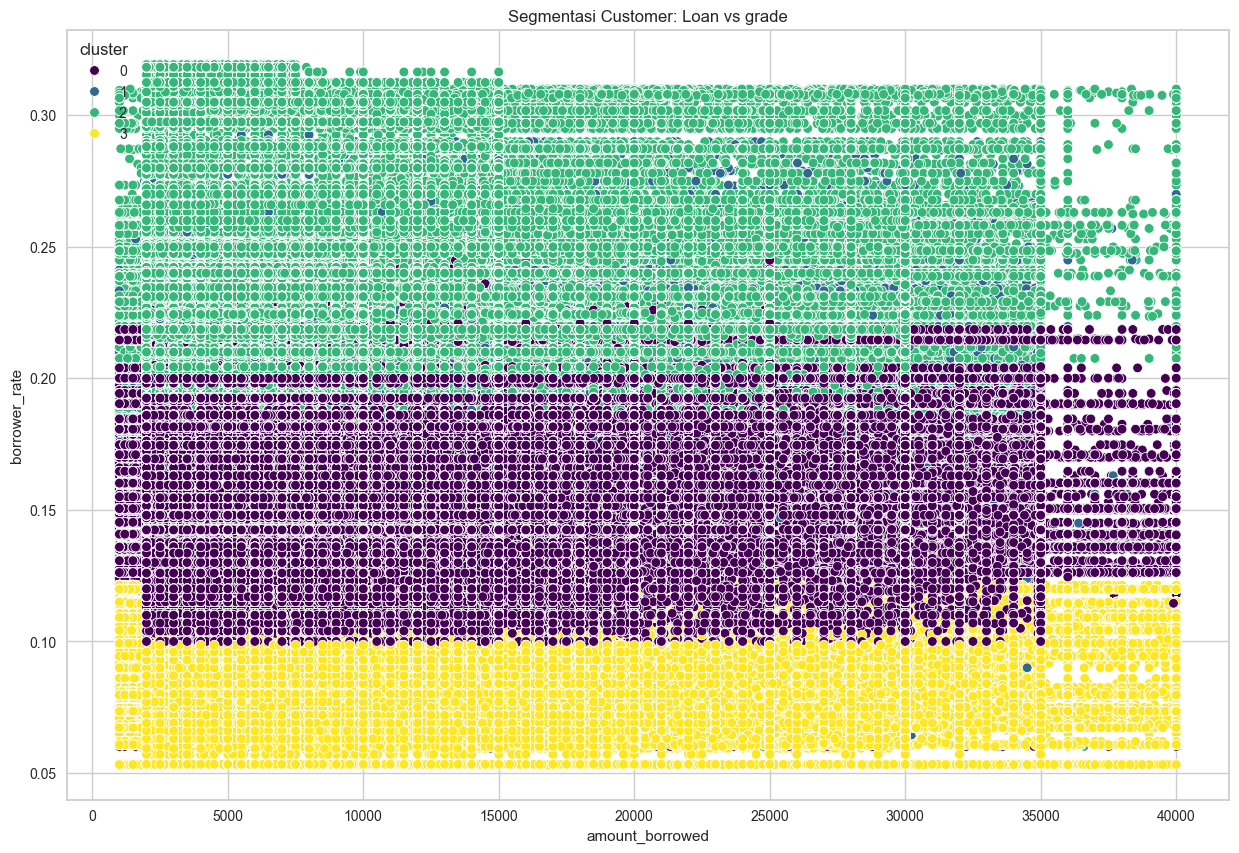

In [25]:
# Visualisasi
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_summary, x='amount_borrowed', y='borrower_rate', hue='cluster', palette='viridis')
plt.title('Segmentasi Customer: Loan vs grade')
plt.show()

EVALUATE

In [26]:

X = df_summary[features_cluster].values

# Feature Scalling
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_scaled = pd.DataFrame(data = X_std, columns = features_cluster )
df_scaled.describe()

,amount_borrowed,term,borrower_rate,installment,days_past_due,grade_encoded,cluster
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06
mean,-1.518384e-17,-3.163299e-17,2.024511e-16,-3.340444e-16,2.024511e-17,1.366545e-16,-8.604174e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.537333e+00,-2.841923e+00,-1.543775e+00,-1.671042e+00,-3.327489e-01,-1.407019e+00,-1.083873e+00
25%,-7.385755e-01,-6.380771e-01,-7.079772e-01,-7.228764e-01,-3.327489e-01,-6.860994e-01,-1.083873e+00
50%,-2.821423e-01,-6.380771e-01,-1.513828e-01,-2.352274e-01,-3.327489e-01,3.481976e-02,3.642173e-01
75%,6.307239e-01,1.565769e+00,5.339354e-01,5.388749e-01,-6.260674e-02,7.557390e-01,1.088263e+00
max,2.912889e+00,1.565769e+00,3.280647e+00,7.086993e+00,1.048194e+01,2.918497e+00,1.088263e+00


In [27]:
df_scaled.head()

,amount_borrowed,term,borrower_rate,installment,days_past_due,grade_encoded,cluster
0,-1.137954,-0.638077,3.262517,-0.927931,-0.332749,2.918497,0.364217
1,-0.510359,-0.638077,1.924515,-0.151802,-0.332749,1.476658,0.364217
2,-0.624467,-0.638077,-0.876587,-0.574699,-0.332749,-0.686099,1.088263
3,1.771807,-0.638077,-1.057888,1.974027,-0.332749,-1.407019,1.088263
4,-0.966678,-0.638077,3.262517,-0.673679,-0.332749,2.918497,0.364217


In [28]:
#BASE FIT
from sklearn.cluster import KMeans

sil_scores = {}
inertia = {}
K_RANGE = range(2, 9)  # Mencoba cluster 2 sampai 8

for k in K_RANGE:
    # Training pada SAMPLE
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_sample = km.fit_predict(df_scaled)
    
    # Hitung score pada SAMPLE (Cepat)
    sil = silhouette_score(df_scaled, 
                            labels_sample,
                            sample_size=20000,
                            random_state=42)
    sil_scores[k] = sil
    inertia[k] = km.inertia_
    print(f"k={k}, Silhouette={sil:.4f}, Inertia={km.inertia_:.2f}")

k=2, Silhouette=0.3212, Inertia=14314147.21
k=3, Silhouette=0.3298, Inertia=11584430.10
k=4, Silhouette=0.3527, Inertia=9494396.61
k=5, Silhouette=0.3721, Inertia=7813748.40
k=6, Silhouette=0.3975, Inertia=6519415.28
k=7, Silhouette=0.4013, Inertia=5567902.12
k=8, Silhouette=0.4270, Inertia=5026835.52


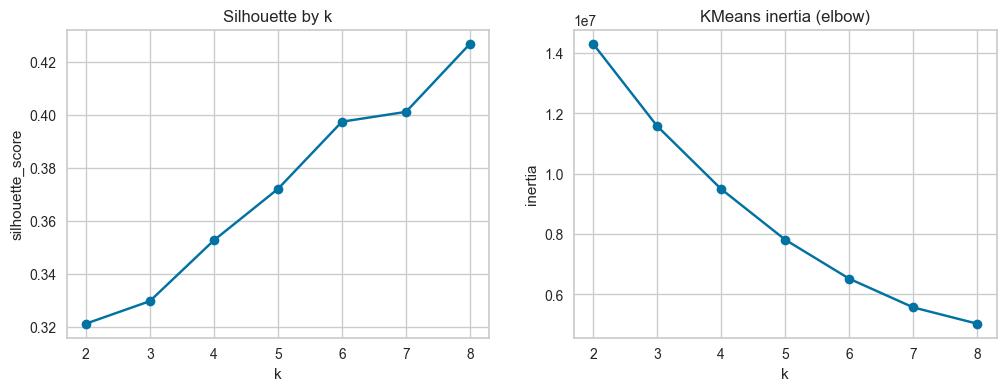

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), '-o')
plt.title('Silhouette by k')
plt.xlabel('k')
plt.ylabel('silhouette_score')

plt.subplot(1,2,2)
plt.plot(list(inertia.keys()), list(inertia.values()), '-o')
plt.title('KMeans inertia (elbow)')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [30]:
# Inisialisasi objek kmeans dengan n cluster = 5 (sesuai dengan hasil Elbow Method)
kmeans_elbow = KMeans(n_clusters=5)
kmeans_elbow.fit(df_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [31]:
df_summary[features_cluster].head()

,amount_borrowed,term,borrower_rate,installment,days_past_due,grade_encoded,cluster
0,4500.0,36,0.3182,195.55,0,7,2
1,10000.0,36,0.2444,394.64,0,5,2
2,9000.0,36,0.0899,286.16,0,2,3
3,30000.0,36,0.0799,939.95,0,1,3
4,6001.0,36,0.3182,260.77,0,7,2


In [32]:
# Tambahkan label klaster ke DataFrame
df_summary['cluster_elbow'] = kmeans_elbow.labels_
df_summary.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,principal_balance,principal_paid,interest_paid,...,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,borrower_id,loan_due_date,grade_encoded,cluster,cluster_elbow
0,1047556,4500.0,36,0.3182,195.55,G,2026-05-30,4346.27,153.73,237.37,...,2026-09-30,2026-08-30,0,CURRENT,Prosper,104707556,2029-06-30,7,2,0
1,1047487,10000.0,36,0.2444,394.64,E,2026-05-30,0.00,10000.00,552.77,...,2026-10-30,2026-08-30,0,COMPLETED,Prosper,104707487,2029-06-30,5,2,0
2,1045856,9000.0,36,0.0899,286.16,B,2026-05-30,8561.29,438.71,133.61,...,2026-09-30,2026-08-30,0,CURRENT,Prosper,104505856,2029-06-30,2,3,3
3,1050525,30000.0,36,0.0799,939.95,A,2026-05-30,28515.86,1484.14,395.76,...,2026-09-30,2026-08-30,0,CURRENT,Prosper,105000525,2029-06-30,1,3,4
4,1047529,6001.0,36,0.3182,260.77,G,2026-05-30,4389.44,1611.56,188.44,...,2026-08-30,2026-08-30,0,CURRENT,Prosper,104707529,2029-06-30,7,2,0


In [33]:
df_summary[['cluster_elbow']].value_counts()
# df_summary.head(10000)

cluster_elbow
3                964503
1                726815
2                569915
4                311340
0                302573
Name: count, dtype: int64

In [34]:
# df_summary[['grade','cluster_elbow']].value_counts()
print(pd.crosstab(df_summary['cluster_elbow'], df_summary['cluster']))


cluster             0      1       2       3
cluster_elbow                               
0                  91   7064  295418       0
1              659309  67397     109       0
2              457402  48609   48726   15178
3                   0   1418       0  963085
4              114078  11976   11613  173673


In [35]:
# df_summary[['grade','cluster_elbow']].value_counts()
print(pd.crosstab(df_summary['cluster_elbow'], df_summary['grade']))


grade               A       B       C       D       E       F      G
cluster_elbow                                                       
0                   0       0       0      92  165457  100923  36101
1                2896   17823  444425  256142    5501      25      3
2                 177   18393  265157  219680   58369    7548    591
3              363042  601461       0       0       0       0      0
4               67188  110826   77943   42565   11804     823    191


In [36]:
print(df_summary['cluster_elbow'].value_counts())

cluster_elbow
3    964503
1    726815
2    569915
4    311340
0    302573
Name: count, dtype: int64


c:\anaconda3\envs\final_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


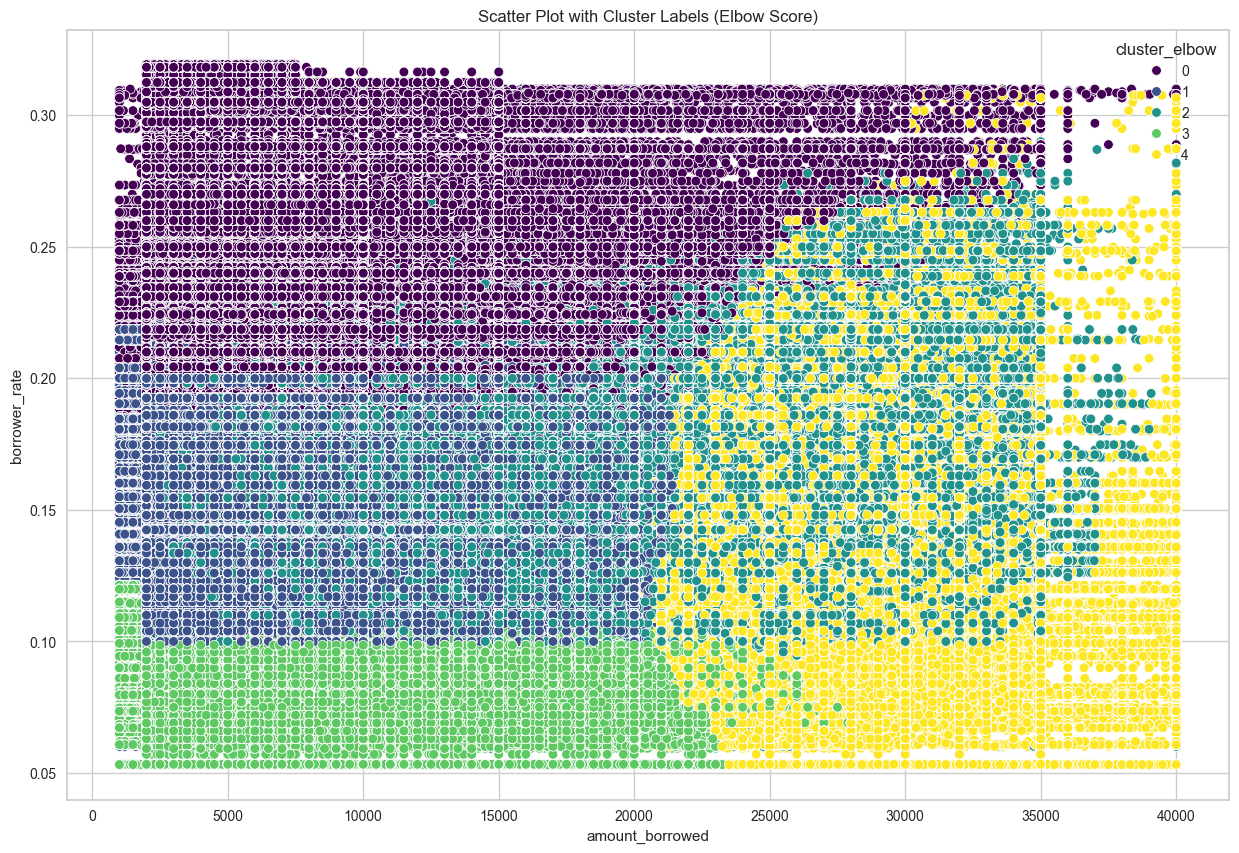

In [37]:
# Evaluasi cluster_elbow
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_summary, x='amount_borrowed', y='borrower_rate', hue='cluster_elbow' , palette='viridis')
plt.title('Scatter Plot with Cluster Labels (Elbow Score)')
plt.show()

In [38]:
features_cluster.append('cluster_elbow')

In [39]:
cluster_summary = df_summary.groupby('cluster_elbow')['grade_encoded'].mean()
print(cluster_summary)

cluster_elbow
0    5.571872
1    3.335183
2    3.601281
3    1.623597
4    2.435357
Name: grade_encoded, dtype: float64


In [40]:
pd.crosstab(df_summary['cluster_elbow'], df['grade'])

grade,A,B,C,D,E,F,G
cluster_elbow,,,,,,,
0,0,0,0,92,165457,100923,36101
1,2896,17823,444425,256142,5501,25,3
2,177,18393,265157,219680,58369,7548,591
3,363042,601461,0,0,0,0,0
4,67188,110826,77943,42565,11804,823,191


In [43]:
features = [
    'amount_borrowed', 
    'borrower_rate', 
    'installment',
    'principal_balance', 
    'principal_paid', 
    'interest_paid',
    'days_past_due'
]

# 2. Gabungkan Daftar Fitur (Termasuk 'grade_encoded')
all_features = features + ['grade_encoded']

# 3. Hitung Centroid (Rata-Rata) untuk Semua Fitur
cluster_summary_full = df_summary.groupby('cluster_elbow')[all_features].mean()

# 4. Hitung Jumlah Anggota Klaster
cluster_counts = df_summary['cluster_elbow'].value_counts().sort_index().rename('Count')

# 5. Gabungkan Ringkasan dan Jumlah Anggota
final_summary = pd.concat([cluster_summary_full, cluster_counts], axis=1)

# Atur format tampilan agar mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format
print(final_summary)

               amount_borrowed  borrower_rate  installment  principal_balance  \
cluster_elbow                                                                   
0                    11,124.26           0.09       352.54           3,049.50   
1                    16,992.86           0.18       429.59           6,573.41   
2                    29,162.40           0.14       915.65          10,399.90   
3                     8,660.51           0.17       307.64           2,400.86   
4                    20,257.69           0.10       430.23          10,521.90   

               principal_paid  interest_paid  days_past_due  grade_encoded  \
cluster_elbow                                                                
0                    7,857.71       1,018.30          31.60           1.58   
1                    8,177.30       3,883.71         107.96           4.02   
2                   16,666.80       4,132.52          79.26           3.02   
3                    5,406.34       1,383.

In [61]:
df_summary[features_cluster].groupby('cluster_elbow').mean()
# df_summary[features_cluster]


,amount_borrowed,term,borrower_rate,installment,days_past_due,grade_encoded,cluster
cluster_elbow,,,,,,,
0,"24,961.36",41.73,0.09,725.18,29.42,1.62,3.00
1,"15,055.55",60.00,0.15,359.10,36.07,3.44,0.02
2,"9,443.71",44.80,0.25,328.57,27.45,5.57,2.00
3,"25,410.79",35.99,0.16,889.38,41.20,3.54,0.21
4,"9,465.03",37.89,0.09,289.63,27.83,1.63,3.00
5,"14,396.98",44.92,0.16,432.75,"1,010.18",3.51,1.00
6,"8,547.61",36.00,0.15,295.38,30.06,3.36,0.00
7,"28,449.01",60.00,0.18,722.36,56.97,4.10,0.69


In [35]:
print(df_summary['cluster_elbow'].value_counts().sort_index())

cluster_elbow
0    347920
1    335274
2    266332
3    196384
4    804882
5    121382
6    594755
7    208217
Name: count, dtype: int64


In [44]:
import os

base_dir = os.getcwd()
file_path = os.path.join(base_dir, 'csv', 'hasil_clustering_final_basefit.csv')



df_summary.to_csv(file_path, index=False)
print("File 'hasil_clustering_final.csv' berhasil disimpan!")
print(df_summary['cluster_elbow'].value_counts())

File 'hasil_clustering_final.csv' berhasil disimpan!
cluster_elbow
0    905908
3    839562
1    608109
2    377659
4    143908
Name: count, dtype: int64
